# Loan Approval Prediction

In [243]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [244]:
df = pd.read_csv("loan approval dataset.csv")
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


# Data Exploration

In [245]:
df.shape

(45000, 14)

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [247]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [248]:
df.duplicated().sum()

0

In [249]:
summary_info = pd.DataFrame({'Dtypes': df.dtypes, 'Nuique': df.nunique(), 'Null_Ratio': round(df.isnull().sum() / len(df) * 1000,2)})
summary_info

,Dtypes,Nuique,Null_Ratio
person_age,float64,60,0.0
person_gender,object,2,0.0
person_education,object,5,0.0
person_income,float64,33989,0.0
person_emp_exp,int64,63,0.0
person_home_ownership,object,4,0.0
loan_amnt,float64,4483,0.0
loan_intent,object,6,0.0
loan_int_rate,float64,1302,0.0
loan_percent_income,float64,64,0.0


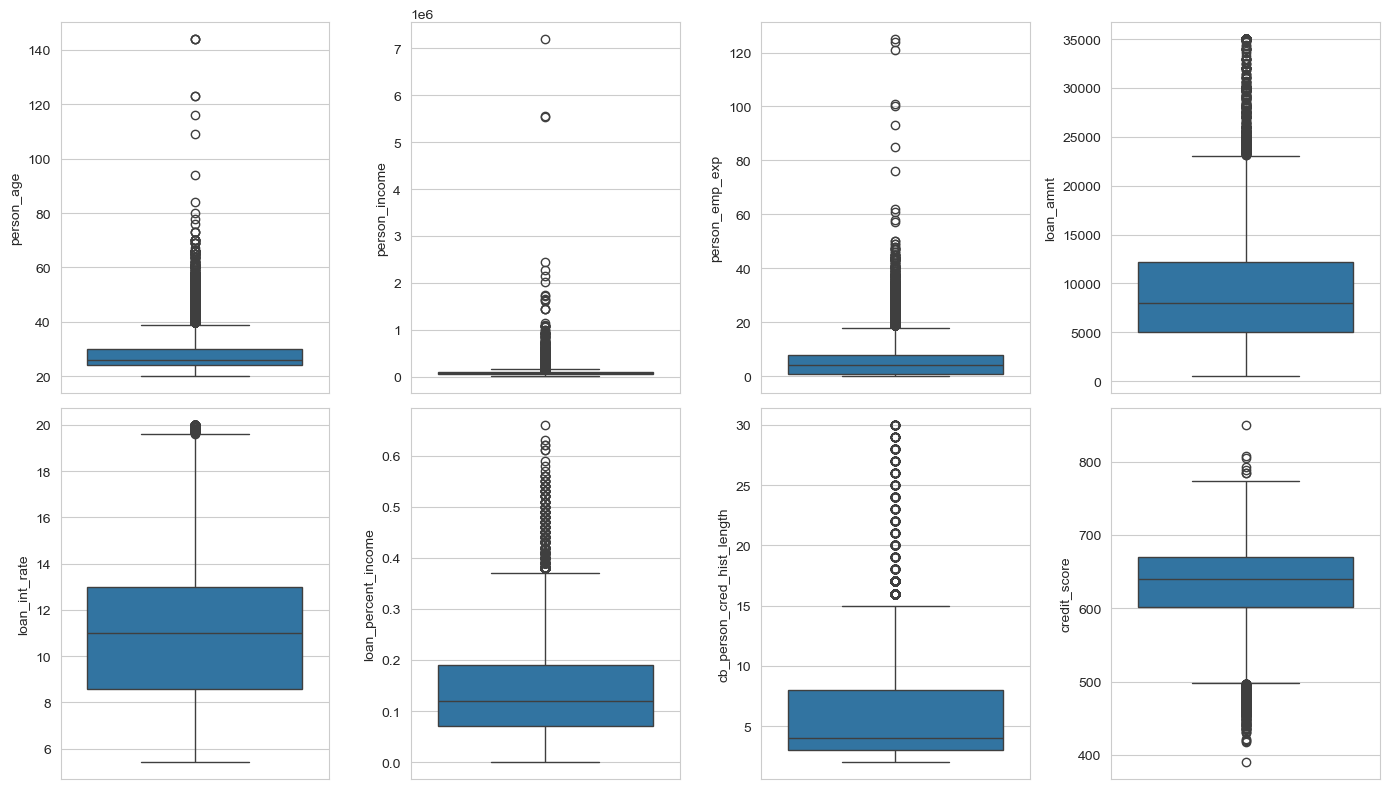

In [250]:
# check outliers
numeric_cols = df.drop('loan_status',axis=1).select_dtypes(include=np.number).columns
plt.figure(figsize=(14,8))
for i,col in enumerate(numeric_cols):
    plt.subplot(2,4,i+1)
    sns.boxplot(data=df,y=col)
plt.tight_layout()
plt.show()

# Data Cleaning & Preprocessing

In [251]:
# Standardize text formatting
object_cols = df.select_dtypes(include='object')
for col in object_cols:
    df[col] = df[col].str.title()

In [252]:
# check outliers in object columns
df['person_home_ownership'].value_counts()

person_home_ownership
Rent        23443
Mortgage    18489
Own          2951
Other         117
Name: count, dtype: int64

In [253]:
# Handle categorical value inconsistencies
df = df.replace({'person_home_ownership': {'Other': 'Rent'}})

In [254]:
# Feature Engineering: Creating new features based on domain knowledge
df['income_emp_ratio'] = df['person_income'] / (df['person_emp_exp'] + 1)
df['emp_stability'] = df['person_emp_exp'] / (df['person_age'] + 1)

In [255]:
age_bins = [18, 25, 35, 50, 65]
age_labels = ['18-25', '26-35', '36-50', '51-65']
df['age_group'] = pd.cut(df['person_age'], bins=age_bins, labels=age_labels)

In [256]:
df['credit_score_group'] = pd.cut(df['credit_score'], bins=[0, 580, 670, 740, 800, 850], 
                                labels=['Poor', 'Fair', 'Good', 'Very Good', 'Excellent'])

In [257]:
df['loan_risk_category'] = pd.cut(df['loan_int_rate'], bins=[0, 10, 15, 20], 
                                    labels=['Low Risk', 'Medium Risk', 'High Risk'])

In [258]:
income_bins = [0, 30000, 60000, 90000, 120000, float('inf')]
income_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
df['income_group'] = pd.cut(df['person_income'], bins=income_bins, labels=income_labels)

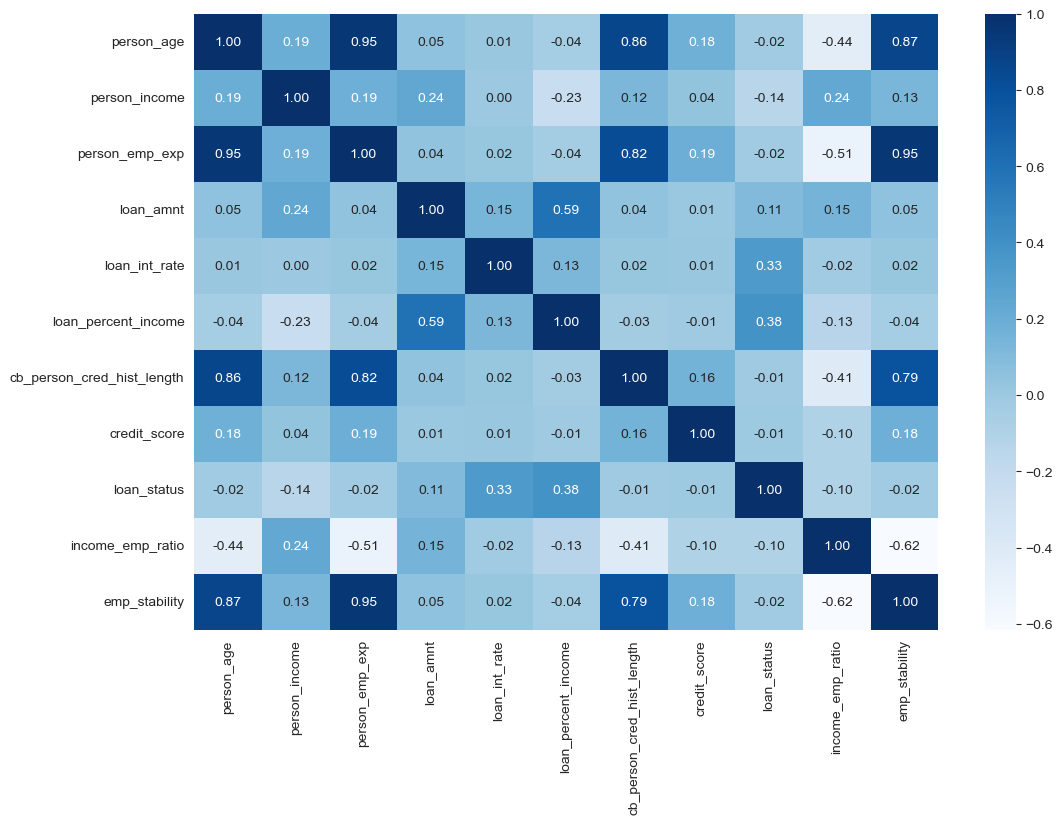

In [259]:
# show correlations between the features
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True),annot=True,fmt='.2f',cmap='Blues')
plt.show()

In [260]:
# drop irrelevant features
df.drop(columns=['person_emp_exp'],axis=1,inplace=True)

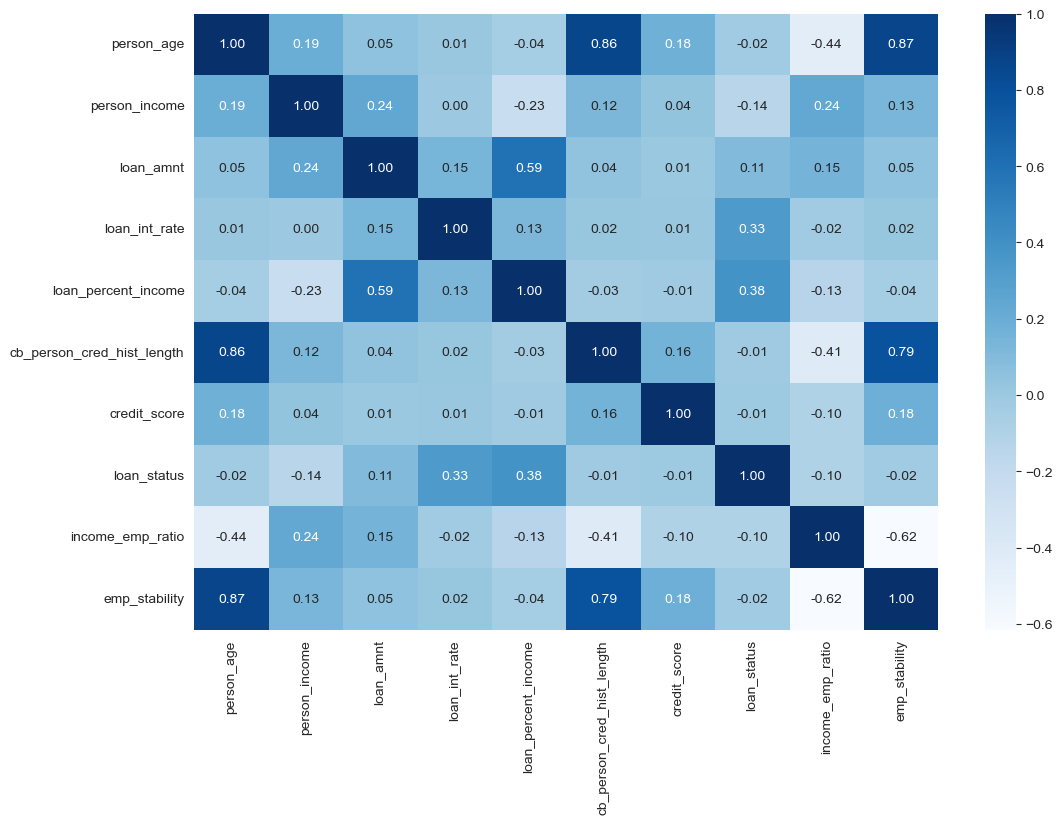

In [261]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True),annot=True,fmt='.2f',cmap='Blues')
plt.show()

# Data Visulaization

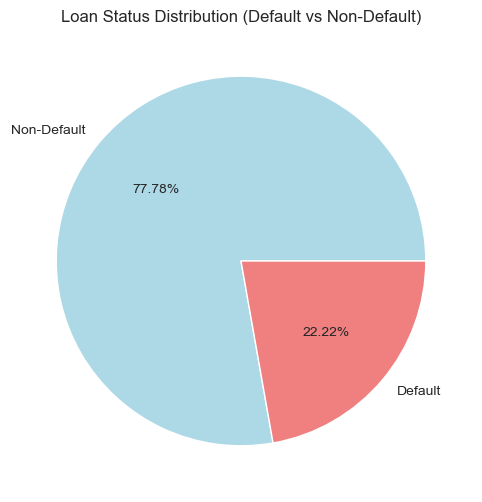

In [262]:
# Target variable distribution
plt.figure(figsize=(8, 6))
loan_status_counts = df['loan_status'].value_counts()
plt.pie(loan_status_counts, labels=['Non-Default', 'Default'], autopct='%1.2f%%', 
        colors=['lightblue', 'lightcoral'])
plt.title('Loan Status Distribution (Default vs Non-Default)')
plt.show()

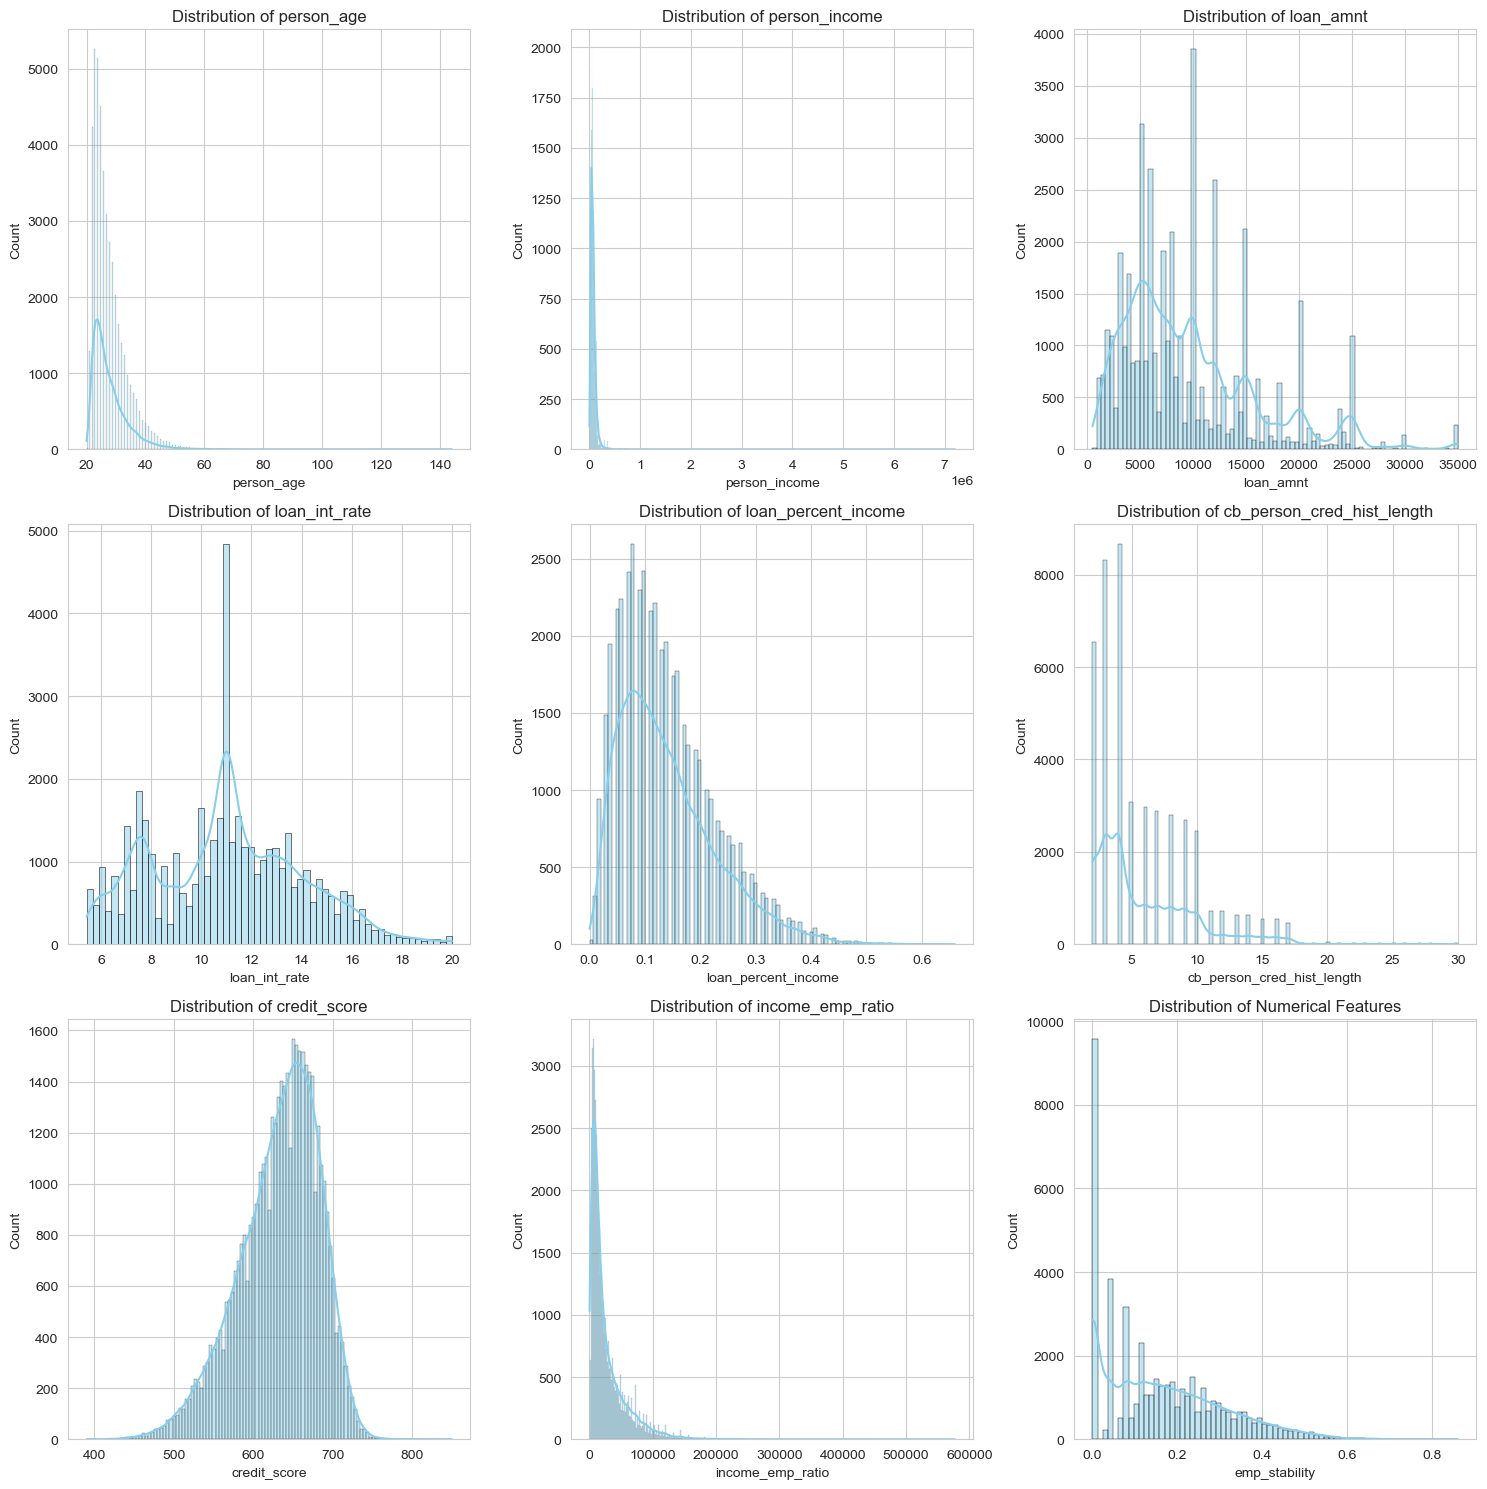

In [263]:
# Numerical features distribution
numeric_cols = df.drop('loan_status',axis=1).select_dtypes(include=np.number).columns
n_numeric = len(numeric_cols)
n_cols = 3
n_rows = (n_numeric + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i], color='skyblue', edgecolor="black")
    axes[i].set_title(f'Distribution of {col}')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.title("Distribution of Numerical Features")
plt.tight_layout()
plt.show()

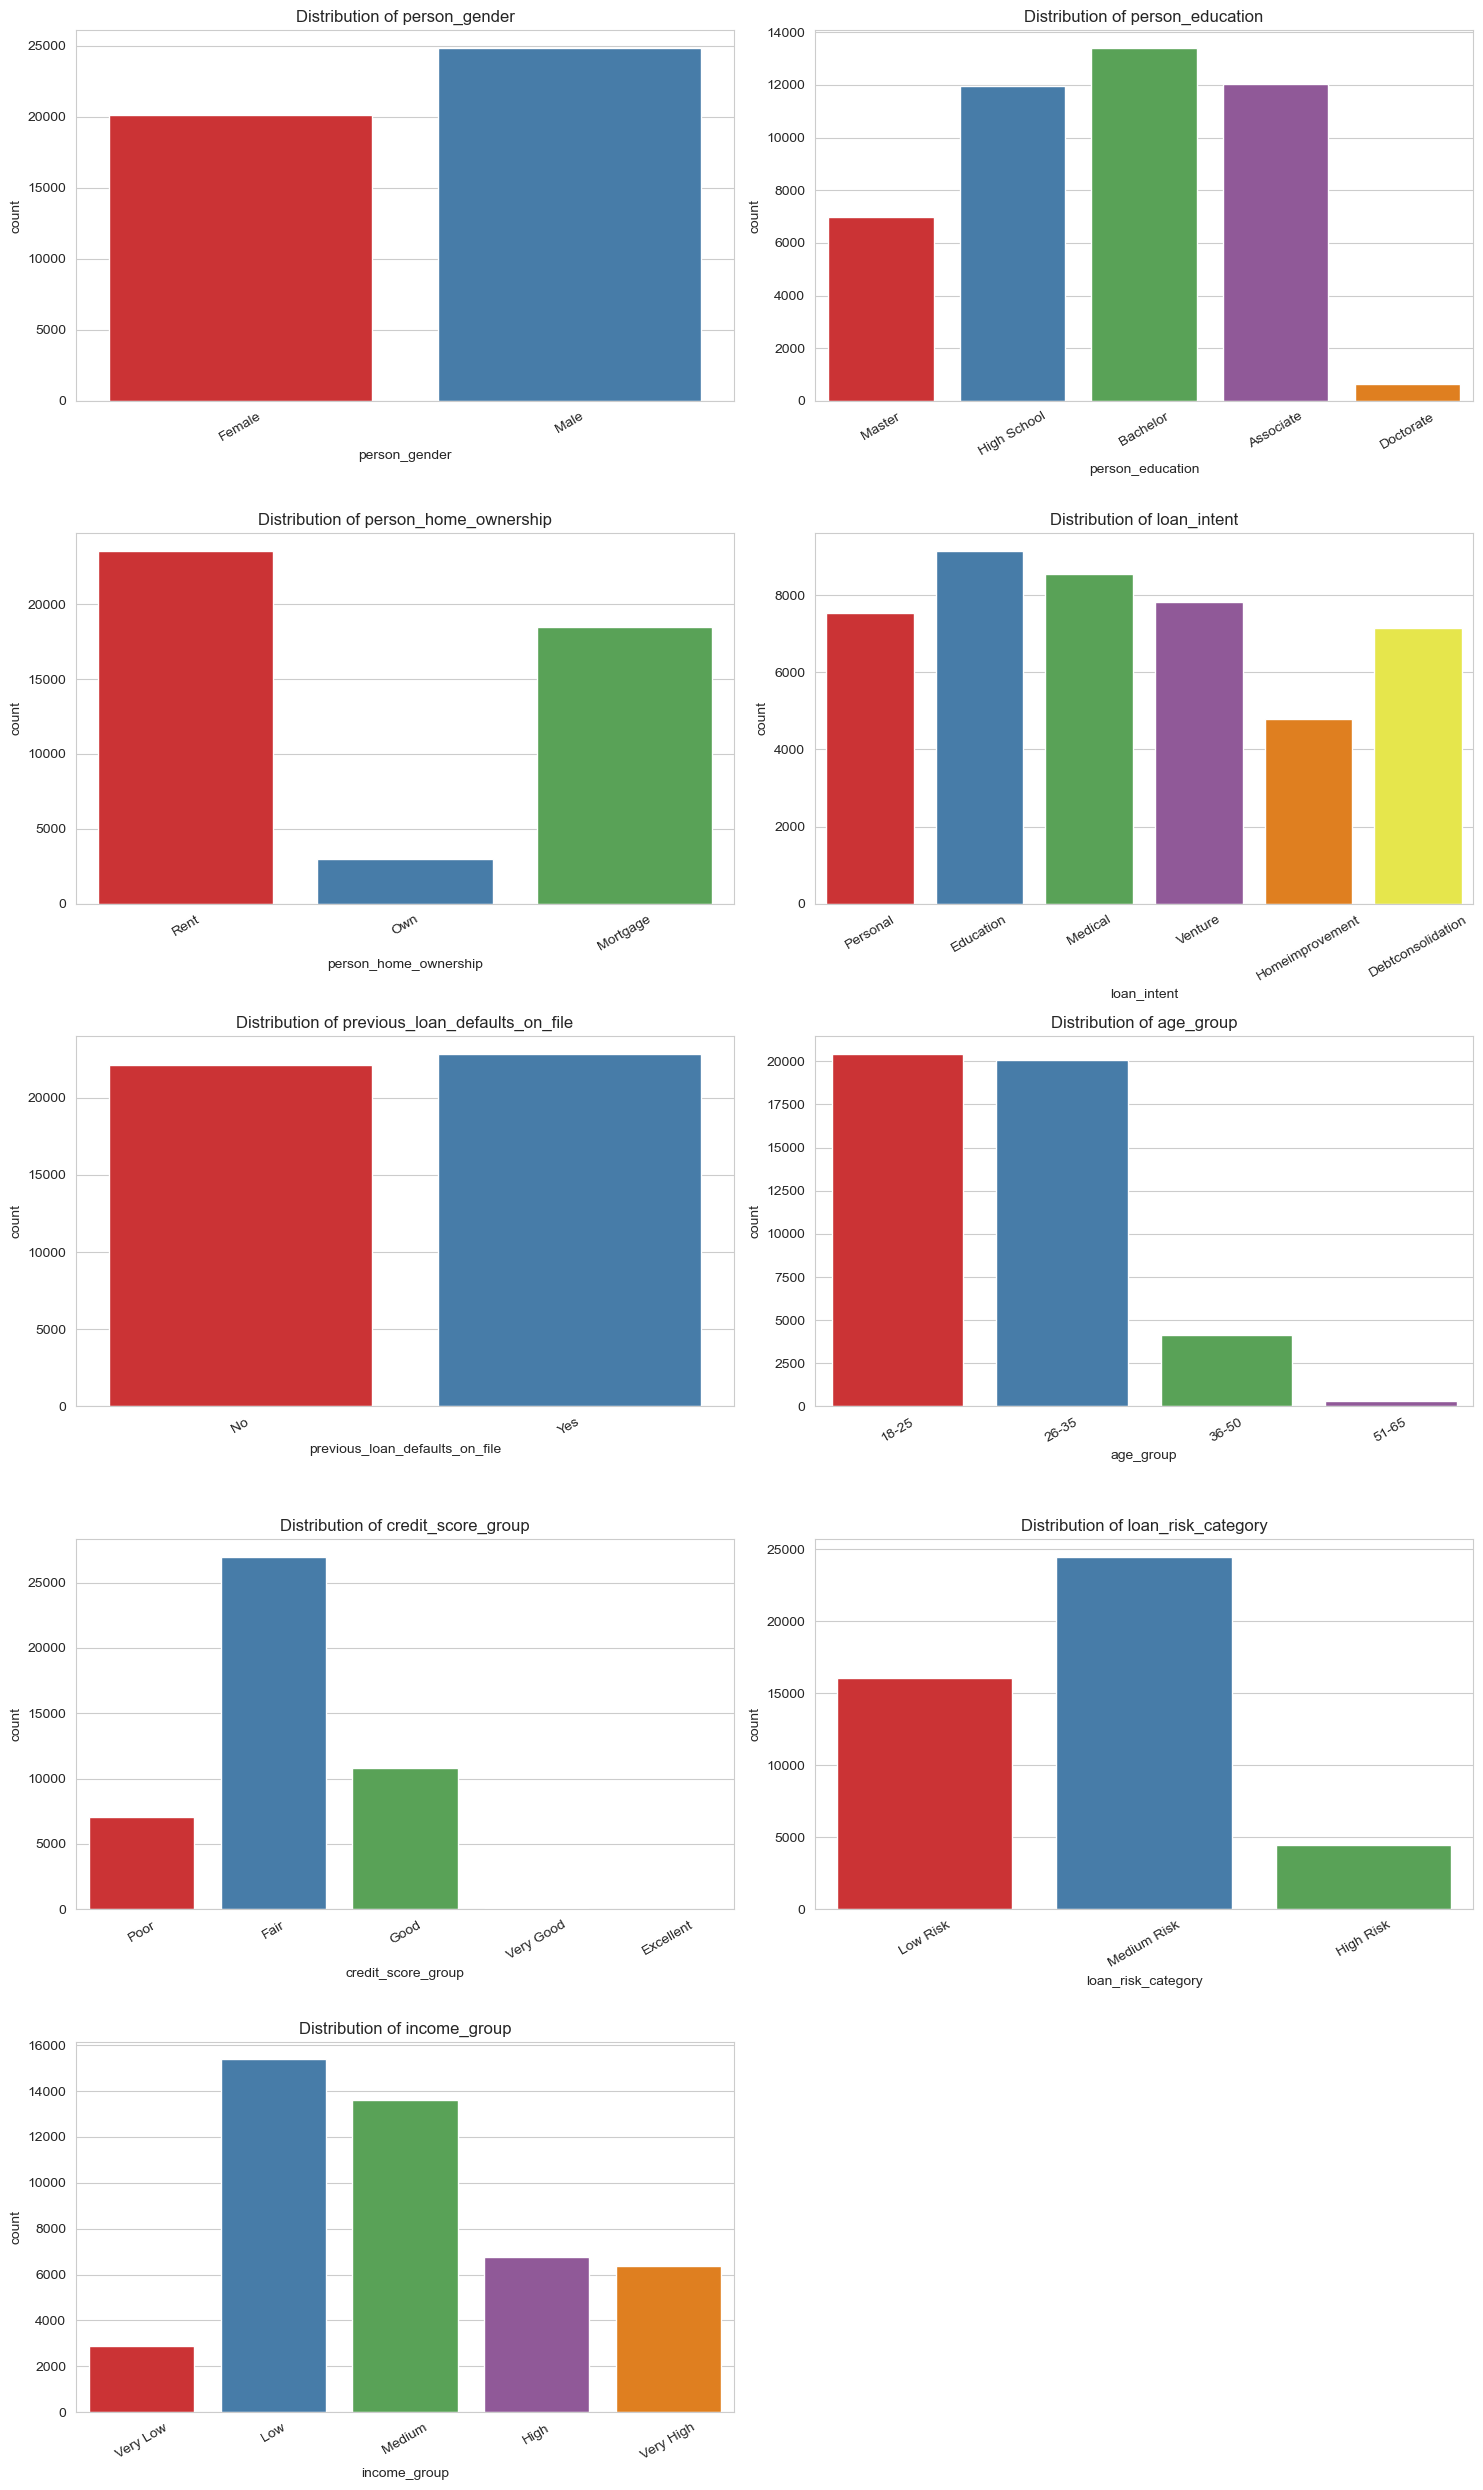

In [264]:
# Distribution for Categorical Features
cat_cols = df.select_dtypes(include=['object','category']).columns
n_cat = len(cat_cols)
n_cols = 2
n_rows = (n_cat + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=df, palette="Set1", ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].tick_params(axis="x", rotation=30)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

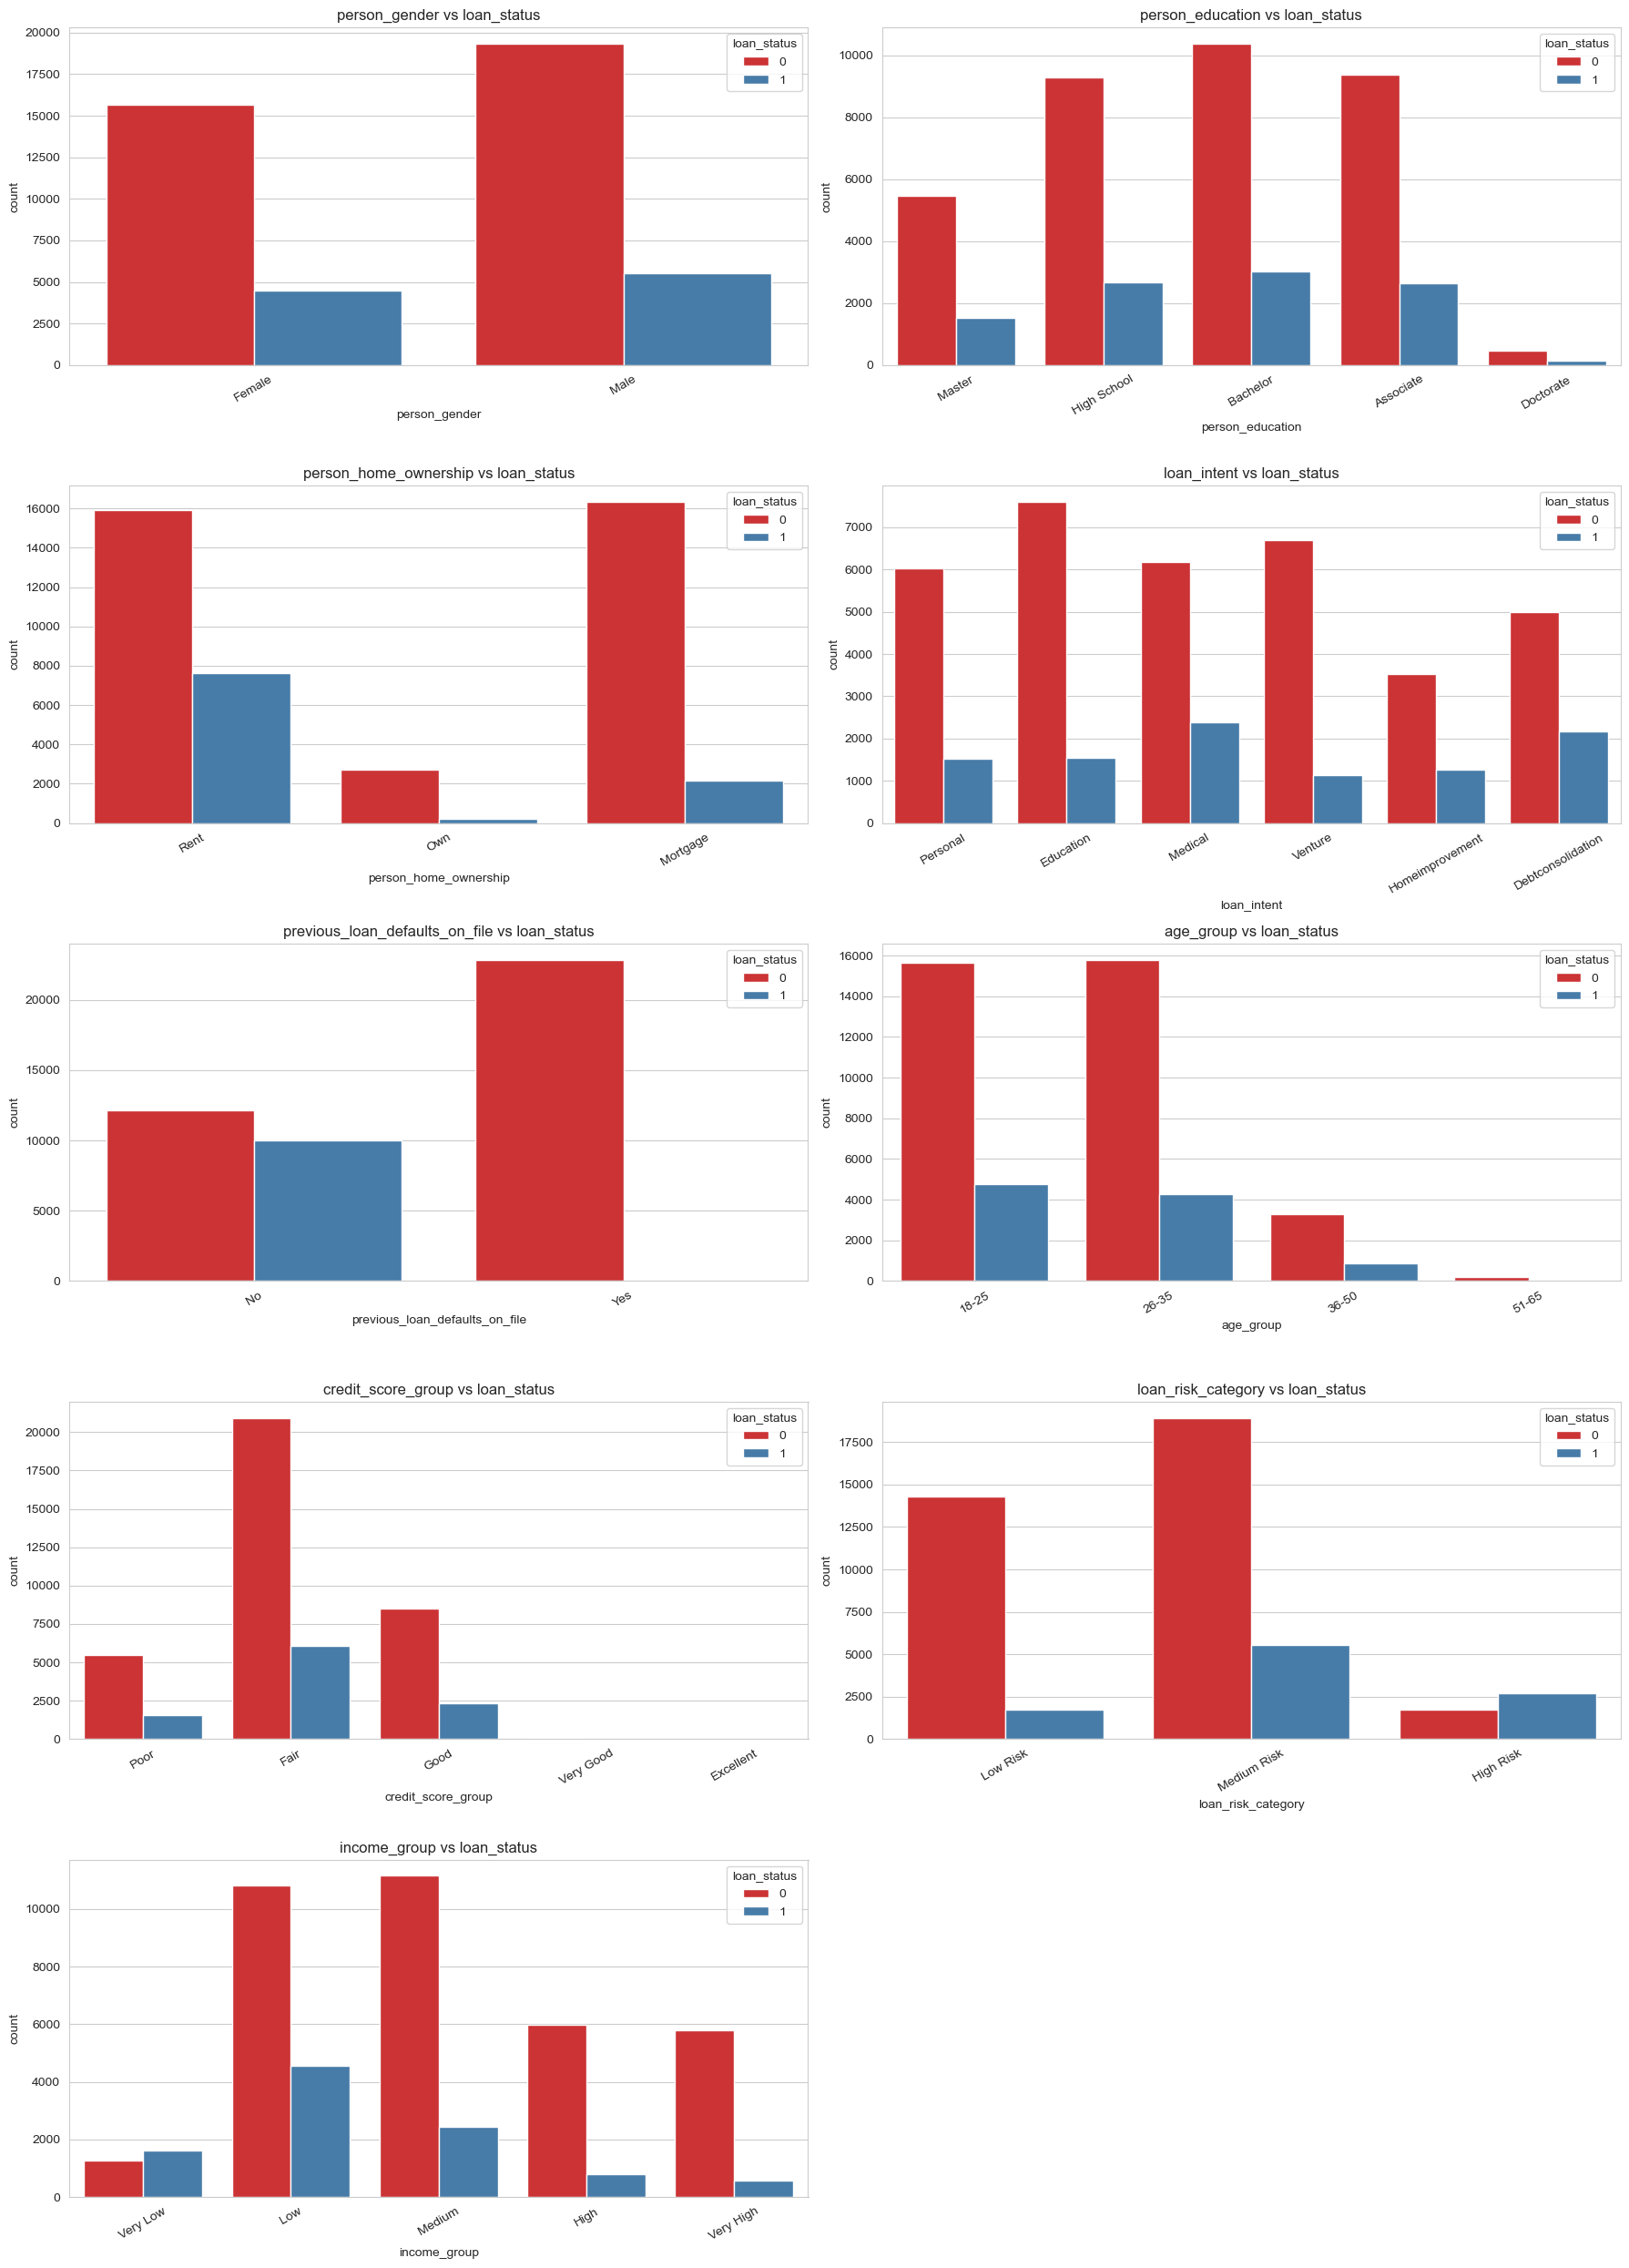

In [265]:
# Relationship between categorical features and target variable
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(x=col, hue="loan_status", data=df, palette="Set1", ax=axes[i])
    axes[i].set_title(f"{col} vs loan_status")
    axes[i].tick_params(axis="x", rotation=30)

for j in range(len(cat_cols), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

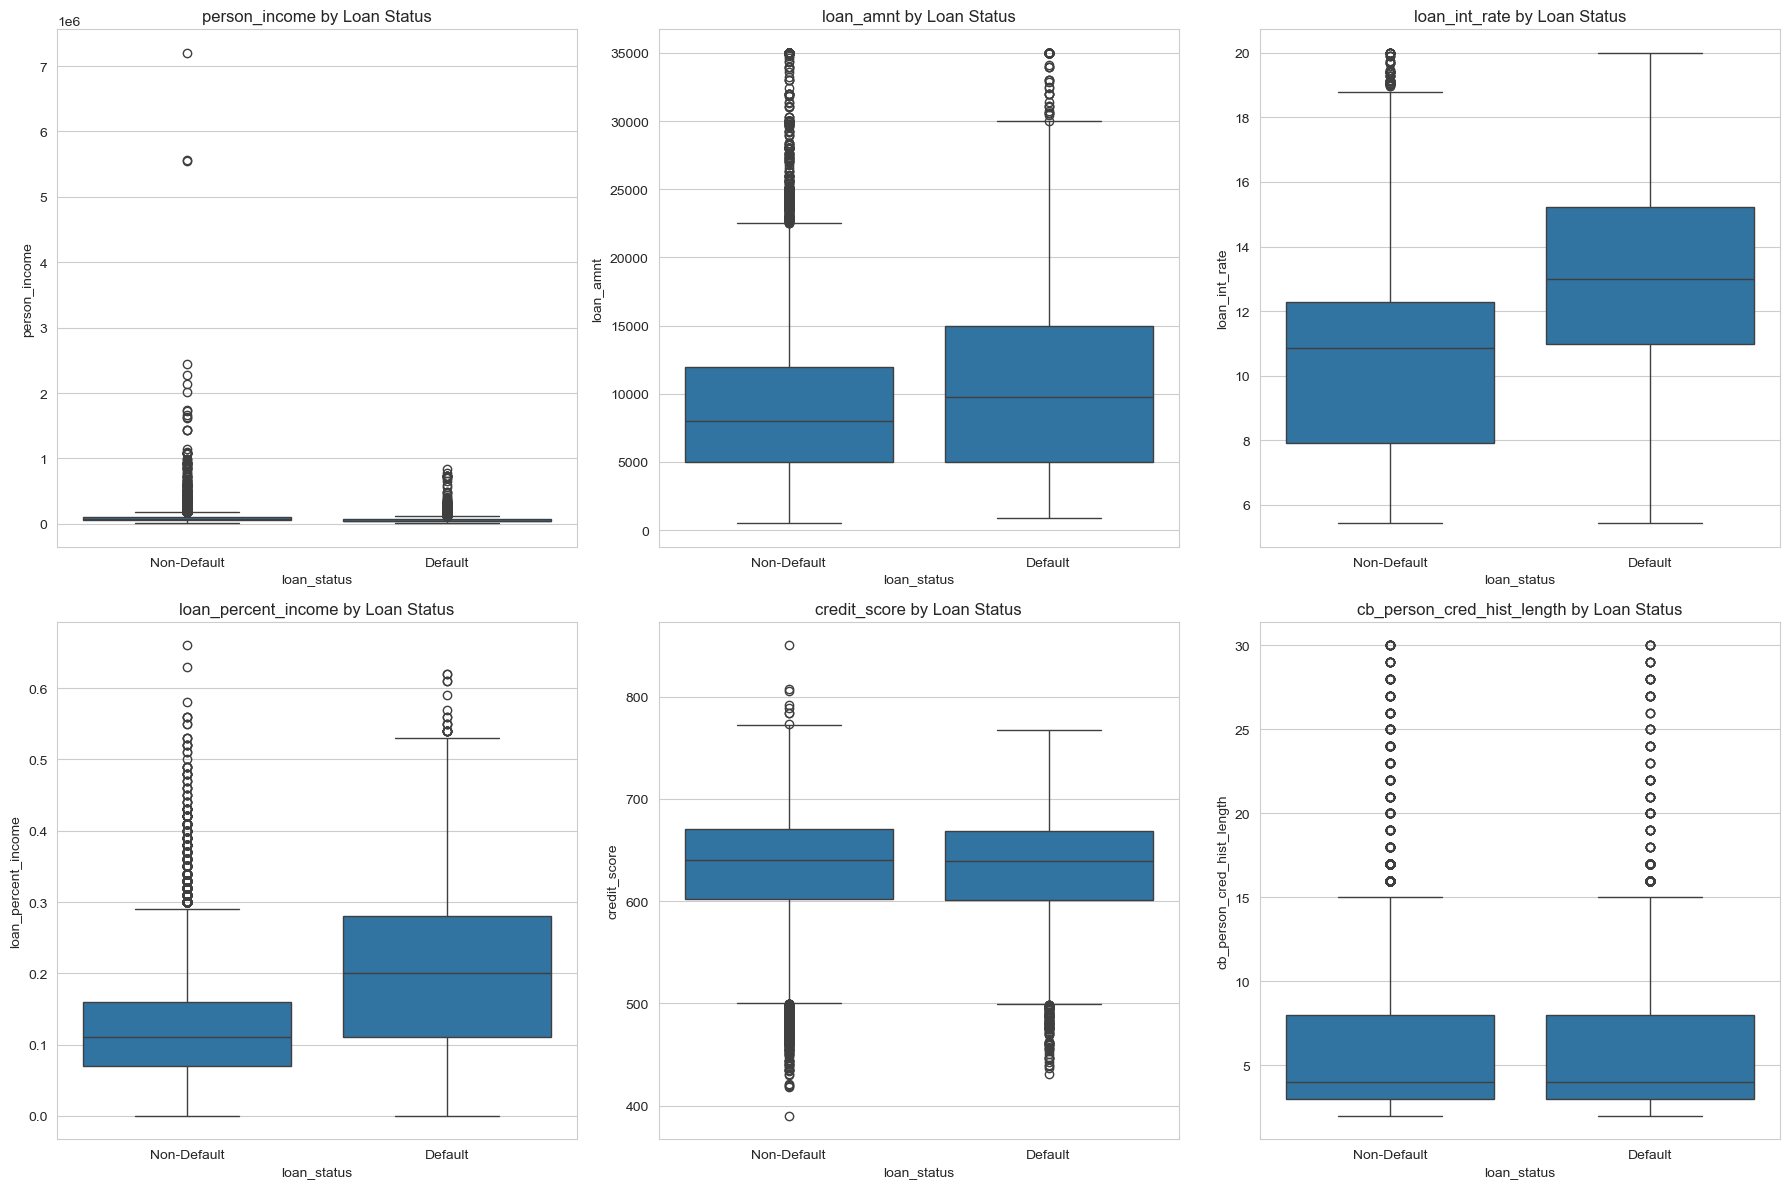

In [266]:
# Analysis of relationships between numerical features and target variable
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

important_numeric = ['person_income', 'loan_amnt', 'loan_int_rate', 
                        'loan_percent_income', 'credit_score', 'cb_person_cred_hist_length']

for i, col in enumerate(important_numeric):
    if i < len(axes):
        sns.boxplot(x='loan_status', y=col, data=df, ax=axes[i])
        axes[i].set_title(f'{col} by Loan Status')
        axes[i].set_xticklabels(['Non-Default', 'Default'])

plt.tight_layout()
plt.show()

# Additional Analysis and Insights Generation

In [267]:
# Analysis by gender
gender_analysis = df.groupby('person_gender')['loan_status'].agg(['count', 'mean'])
gender_analysis.columns = ['Total_Loans', 'Default_Rate']
gender_analysis['Default_Rate'] = round(gender_analysis['Default_Rate'] * 100,2)
print("\n Analysis by Gender:")
gender_analysis


 Analysis by Gender:


,Total_Loans,Default_Rate
person_gender,,
Female,20159,22.25
Male,24841,22.20


In [268]:
# Analysis by education level
education_analysis = df.groupby('person_education')['loan_status'].agg(['count', 'mean']).sort_values('mean', ascending=False)
education_analysis.columns = ['Total_Loans', 'Default_Rate']
education_analysis['Default_Rate'] = round(education_analysis['Default_Rate'] * 100,2)
print("\nAnalysis by Education Level:")
education_analysis


Analysis by Education Level:


,Total_Loans,Default_Rate
person_education,,
Doctorate,621,22.87
Bachelor,13399,22.52
High School,11972,22.31
Associate,12028,22.03
Master,6980,21.76


In [269]:
# Analysis by home ownership
home_analysis = df.groupby('person_home_ownership')['loan_status'].agg(['count', 'mean']).sort_values('mean', ascending=False)
home_analysis.columns = ['Total_Loans', 'Default_Rate']
home_analysis['Default_Rate'] = round(home_analysis['Default_Rate'] * 100,2)
print("\nAnalysis by Home Ownership:")
home_analysis


Analysis by Home Ownership:


,Total_Loans,Default_Rate
person_home_ownership,,
Rent,23560,32.40
Mortgage,18489,11.60
Own,2951,7.52


In [270]:
# Analysis by loan purpose
intent_analysis = df.groupby('loan_intent')['loan_status'].agg(['count', 'mean']).sort_values('mean', ascending=False)
intent_analysis.columns = ['Total_Loans', 'Default_Rate']
intent_analysis['Default_Rate'] = round(intent_analysis['Default_Rate'] * 100,2)
print("\nAnalysis by Loan Purpose:")
intent_analysis


Analysis by Loan Purpose:


,Total_Loans,Default_Rate
loan_intent,,
Debtconsolidation,7145,30.27
Medical,8548,27.82
Homeimprovement,4783,26.30
Personal,7552,20.14
Education,9153,16.96
Venture,7819,14.43


In [271]:
# Analysis of income and default rate relationship
income_group_analysis = df.groupby('income_group')['loan_status'].agg(['count', 'mean'])
income_group_analysis.columns = ['Total_Loans', 'Default_Rate']
income_group_analysis['Default_Rate'] = round(income_group_analysis['Default_Rate'] * 100,2)
print("\nAnalysis by Income Group:")
income_group_analysis


Analysis by Income Group:


,Total_Loans,Default_Rate
income_group,,
Very Low,2903,56.22
Low,15383,29.66
Medium,13600,18.02
High,6757,11.74
Very High,6357,8.82


In [272]:
# Analysis of credit score and default rate relationship
credit_analysis = df.groupby('credit_score_group')['loan_status'].agg(['count', 'mean'])
credit_analysis.columns = ['Total_Loans', 'Default_Rate']
credit_analysis['Default_Rate'] = round(credit_analysis['Default_Rate'] * 100,2)
print("\nAnalysis by Credit Score Group:")
credit_analysis


Analysis by Credit Score Group:


,Total_Loans,Default_Rate
credit_score_group,,
Poor,7074,22.31
Fair,26992,22.45
Good,10846,21.61
Very Good,85,21.18
Excellent,3,0.00


In [273]:
# Risk analysis by loan amount and interest rate
risk_analysis = df.groupby('loan_risk_category')['loan_status'].agg(['count', 'mean'])
risk_analysis.columns = ['Total_Loans', 'Default_Rate']
risk_analysis['Default_Rate'] = round(risk_analysis['Default_Rate'] * 100,2)
print("\nRisk Analysis by Interest Rate:")
risk_analysis


Risk Analysis by Interest Rate:


,Total_Loans,Default_Rate
loan_risk_category,,
Low Risk,16043,10.78
Medium Risk,24487,22.66
High Risk,4470,60.87
